In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
from sklearn.metrics import classification_report  # For performance metrics

In [2]:
tf.random.set_seed(3) # weight assignment and initialization will be the same for all runs

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [4]:
print(type(X_train))
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
print(X_train[20])
print(X_train[20].shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38
  190  25   0   0   0   0   0   0   0   0]
 [  0   0   0  13  25  10   0   0   0   0   0   0   0   0   0   0   0 112
  252 125   4   0   0   0   0   0   0   0]
 [  0   0   0 132 252 113   0   0   0   0   0   0   0   0   0   0   0  61
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 240  79   0   0   0   0   0   0   0   0   0   0  84
  252 252  36   0   0   0   0   0   0   0]
 [  0   0   0 132 252 252 238  52   0   0   0   0   0   0   0   

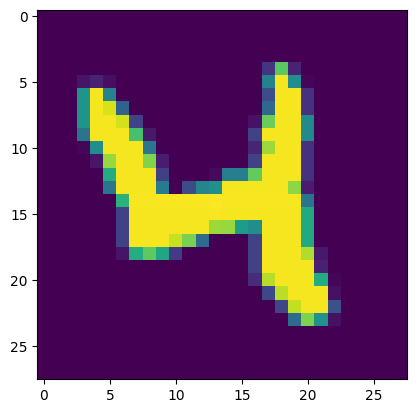

In [6]:
# Iamge display
plt.imshow(X_train[20])
plt.show()

In [7]:
#levels of the image
print(Y_train[20])

4


In [8]:
# Image Levels
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [9]:
# Unique values in Y_train and Y_test
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
# Scaling. Normalizing the data
X_train = X_train/255
X_test = X_test/255

In [11]:
# print the image
print(X_train[20])


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
# Building the Neural Netwrok
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # necessary for input
    keras.layers.Dense(50,activation='relu'), ## features from flatten layer.
    keras.layers.Dense(50,activation='relu'), # more complex feature learning
    keras.layers.Dense(10,activation='sigmoid') #output layer
])

# sigmoid makes output to be interpreted as probability
# with 10 neurons
# model is designed to process 28,28 digits 

C:\Users\Vivobook 15\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.8607 - loss: 0.5058 - val_accuracy: 0.9499 - val_loss: 0.1694
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9577 - loss: 0.1428 - val_accuracy: 0.9603 - val_loss: 0.1300
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9700 - loss: 0.1005 - val_accuracy: 0.9628 - val_loss: 0.1192
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9759 - loss: 0.0791 - val_accuracy: 0.9640 - val_loss: 0.1135
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9803 - loss: 0.0649 - val_accuracy: 0.9670 - val_loss: 0.1087
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9834 - loss: 0.0544 - val_accuracy: 0.9680 - val_loss: 0.1116
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9860 - loss: 0.0461 - val_accuracy: 0.9682 - val_loss: 0.1125
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9885 - loss: 0.0

In [15]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy: ", test_accuracy)
print("Test Loss: ", test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9663 - loss: 0.1370
Test Accuracy:  0.97079998254776
Test Loss:  0.11972657591104507


In [16]:
print(X_test.shape)

(10000, 28, 28)


In [17]:
# Make predictions
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [18]:
print(Y_test.shape)

(10000,)


In [19]:
print(y_pred.shape)

(10000,)


In [20]:
print(y_pred[0])

7


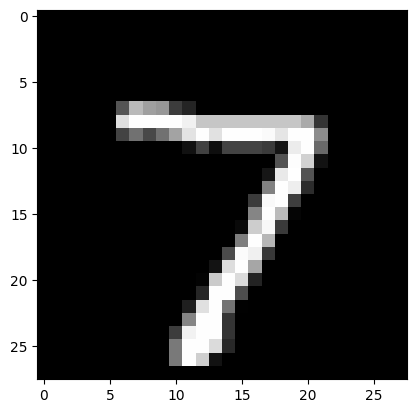

Prediction:  7
True Label:  7


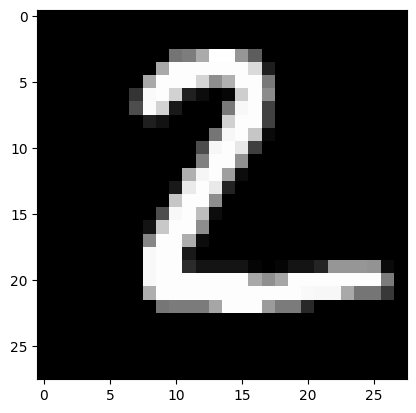

Prediction:  2
True Label:  2


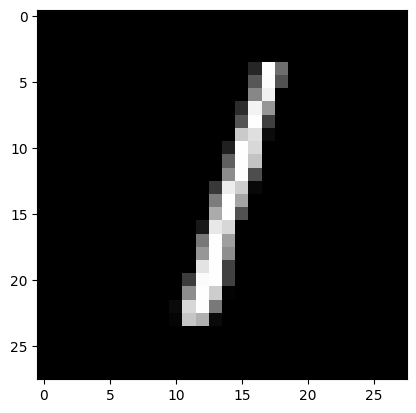

Prediction:  1
True Label:  1


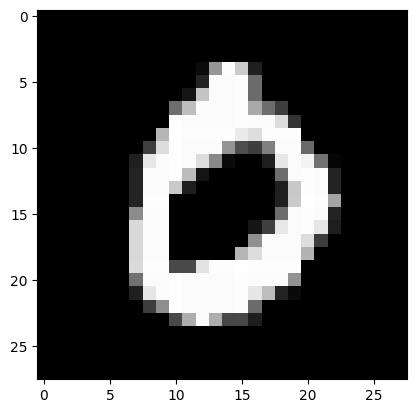

Prediction:  0
True Label:  0


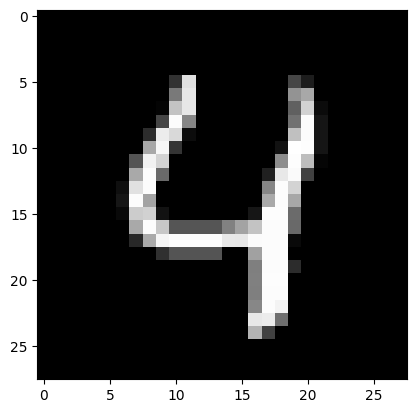

Prediction:  4
True Label:  4


In [21]:
# Display a few test images with their predictions and true labels
for i in range(5):
    plt.imshow(X_test[i], cmap='gray')
    plt.show()
    print("Prediction: ", y_pred[i])
    print("True Label: ", Y_test[i])

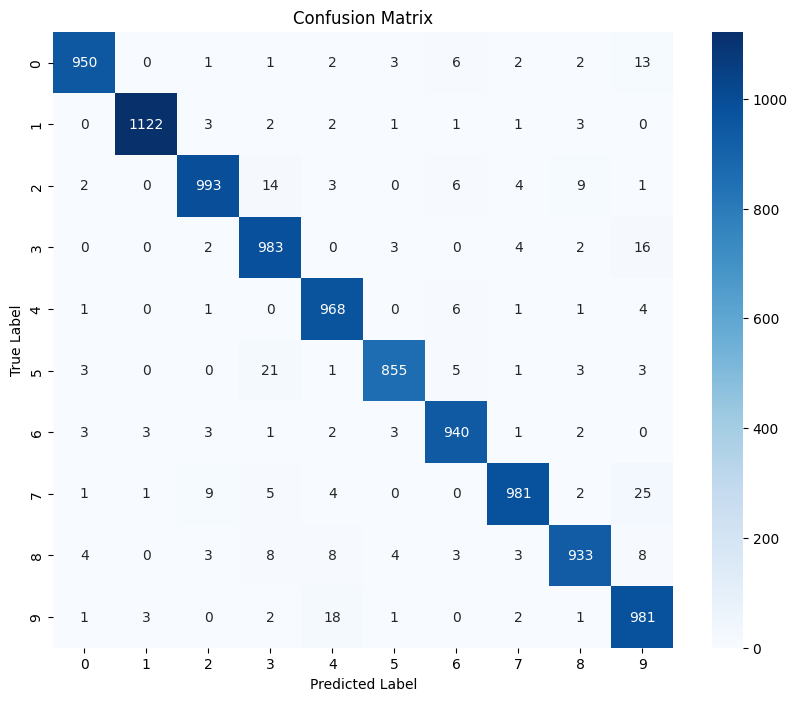

In [22]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [23]:
# Generate and print the performance metrics (Precision, Recall, F1-Score, Accuracy)
performance_report = classification_report(Y_test, y_pred)
print("Performance Metrics:\n", performance_report)

Performance Metrics:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.95      0.97      0.96      1010
           4       0.96      0.99      0.97       982
           5       0.98      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.98      0.95      0.97      1028
           8       0.97      0.96      0.97       974
           9       0.93      0.97      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [24]:
import cv2

In [25]:
input_image_path = "C:/Users/Vivobook 15/Downloads/MNIST_digit.png"
input_image = cv2.imread(input_image_path)

In [26]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [27]:
input_image.shape

(176, 176, 3)

In [28]:
input_image_path = input("Path of the image to be predicted: ")
input_image = cv2.imread(input_image_path)  # Replace with your image file path
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
input_image_resize = cv2.resize(grayscale,(28,28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print("The Handwritten Digit is recognized as: ",input_pred_label)

Path of the image to be predicted: C:/Users/Vivobook 15/Downloads/MNIST_digit.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
The Handwritten Digit is recognized as:  3


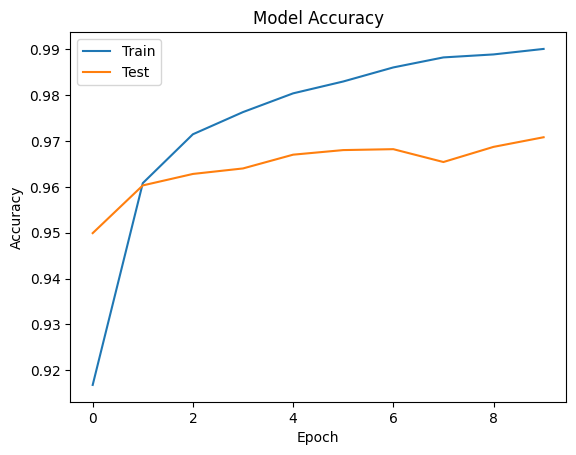

In [29]:
# Plotting the training accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

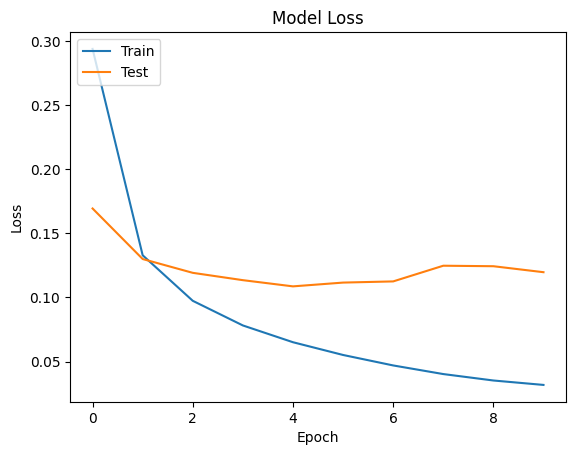

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()